In [1]:
# A 'magic' command to display plots inline
%matplotlib inline

# Import all python modules. You need to run this cell for the other cells to work.
import requests 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

----
## Step 1. Download data
----

### 1a. Defining your area of interest

The `g` geometry parameter is used to download data for a point, line or polygon. Geometry can be written in various formats including WKT, GeoJSON, KML. The examples below use WKT (Well Known Text) format.

#### To get data for a grid cell ...

In [2]:
point = 'POINT(-121.6525 37.7325)'

In [3]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'

# Name of boundary layer in API (Locagrid)
resource = 'locagrid'

#Get ID
url = api + '/' + resource + '/?intersects=' +  point

response = requests.get(url)
data = response.json()
data = data['features'][0]
id  = data['id']
id

40054

### 1b. Download observed daily tasmax

Daily data is stored as a multiband raster, e.g. observed daily timeseries (1950 -2013) has 23376 bands with each band corresponding to one day, starting from 1950-01-01. Units for the observed data are degrees Celsius and projected data are in Kelvin.

The code in the next cell contains a bunch of functions to:
    - fetch daily data given an ID and params
    - return a new Pandas dataframe that contains all the data

In [4]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'
# Request header
headers = {'ContentType': 'json'}

def process_daily_data(slug):
    # Make request
    url = api + '/series/' + slug + '/events/?ref=/api/locagrid/%s/&imperial=TRUE&stat=mean' % id
    response = requests.get(url)
    #print(response)
    # Get data
    if response.ok:
        data = response.json()
        df = pd.DataFrame(data)
        df.set_index('index', inplace = True)
        df.index = pd.to_datetime(df.index)
    
    else:
        print('Failed to download:')
    return df

url = api + '/series/' + slug + '/events/?ref=/api/censustracts/40054/&imperial=TRUE&stat=mean'
response = requests.get(url)
    #print(response)
    # Get data
if response.ok:
    data = response.json()
    df = pd.DataFrame(data)
    df.set_index('index', inplace = True)
    df.index = pd.to_datetime(df.index)
    
else:
    print('Failed to download:')

### 1c. Download projected daily tasmax

The projected daily timeseries are form 2006 - 2099/2100 and units are in degrees Kelvin. You can easily modify the code to add/subtract models, scenarios, climate variables

In [5]:
def get_projections():
    # Create an empty list to hold dataframes
    df_list = []

    # Make a combined list of GCMs, scenarios, climate variables for looping
    climvar = ['wspeed']
    period = ['day']
    models = ['CanESM2', 'CNRM-CM5', 'HadGEM2-ES', 'MIROC5']
    # Cal Adapt support only four priority models
    #models = ['CanESM2', 'CNRM-CM5', 'HadGEM2-ES', 'MIROC5','ACCESS1-0', 'CCSM4', 'CESM1-BGC', 'CMCC-CMS', 'GFDL-CM3', 'HadGEM2-CC']
    scenarios = ['historical', 'rcp85']
    zipped = itertools.product(climvar, period, models, scenarios)

    # Loop through zipped
    for item in zipped:
        # Create slug
        slug = '_'.join(item)
        df = process_daily_data(slug)
        df_list.append(df)
            
    # Combine all the dataframes into one and return
    return pd.concat(df_list)

In [6]:
projectedDF = get_projections()
projectedDF

,name,data
index,,
1950-01-01 00:00:00+00:00,wspeed_day_CanESM2_historical,6.451030
1950-01-02 00:00:00+00:00,wspeed_day_CanESM2_historical,6.047464
1950-01-03 00:00:00+00:00,wspeed_day_CanESM2_historical,5.117450
1950-01-04 00:00:00+00:00,wspeed_day_CanESM2_historical,3.337267
1950-01-05 00:00:00+00:00,wspeed_day_CanESM2_historical,5.436413
1950-01-06 00:00:00+00:00,wspeed_day_CanESM2_historical,4.447727
1950-01-07 00:00:00+00:00,wspeed_day_CanESM2_historical,2.619770
1950-01-08 00:00:00+00:00,wspeed_day_CanESM2_historical,4.962687
1950-01-09 00:00:00+00:00,wspeed_day_CanESM2_historical,1.060881


In [7]:
# Keep only required parameters in slug
projectedDF['Climate Data'] = projectedDF['name'].str.split('_', expand=True)[2] 
projectedDF.index.name = 'Date'
projectedDF.drop(columns= 'name', inplace = True)
projectedDF.head()

,data,Climate Data
Date,,
1950-01-01 00:00:00+00:00,6.451030,CanESM2
1950-01-02 00:00:00+00:00,6.047464,CanESM2
1950-01-03 00:00:00+00:00,5.117450,CanESM2
1950-01-04 00:00:00+00:00,3.337267,CanESM2
1950-01-05 00:00:00+00:00,5.436413,CanESM2


In [8]:
projectedDF = projectedDF.pivot_table( values = 'data', index = 'Date', columns = 'Climate Data')

In [9]:
projectedDF.head()

Climate Data,CNRM-CM5,CanESM2,HadGEM2-ES,MIROC5
Date,,,,
1950-01-01 00:00:00+00:00,2.195829,6.451030,2.171177,2.691252
1950-01-02 00:00:00+00:00,3.232554,6.047464,1.875532,3.713747
1950-01-03 00:00:00+00:00,1.307296,5.117450,1.235327,1.854988
1950-01-04 00:00:00+00:00,1.618153,3.337267,1.321378,2.709942
1950-01-05 00:00:00+00:00,1.870842,5.436413,1.744345,4.147822


In [10]:
projectedDF['avg'] = projectedDF.mean(axis = 1)


In [11]:
wind = projectedDF[['avg']]
wind.head()

Climate Data,avg
Date,
1950-01-01 00:00:00+00:00,3.377322
1950-01-02 00:00:00+00:00,3.717324
1950-01-03 00:00:00+00:00,2.378765
1950-01-04 00:00:00+00:00,2.246685
1950-01-05 00:00:00+00:00,3.299855


In [12]:
wind['year'] = wind.index.year
wind['month'] = wind.index.month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
wind.head()

Climate Data,avg,year,month
Date,,,
1950-01-01 00:00:00+00:00,3.377322,1950,1
1950-01-02 00:00:00+00:00,3.717324,1950,1
1950-01-03 00:00:00+00:00,2.378765,1950,1
1950-01-04 00:00:00+00:00,2.246685,1950,1
1950-01-05 00:00:00+00:00,3.299855,1950,1


In [14]:
# Trimming the data to only Timeframe that we need
historical = wind.loc['1978-12-24':'2005-12-31']
beg_century = wind.loc['2006-01-01':'2034-12-31']
mid_century = wind.loc['2035-01-01':'2064-12-31']
end_century = wind.loc['2065-12-24':'2099-12-31']

In [15]:
historical = historical.pivot_table( values = 'avg', index = 'month', columns = 'year')
beg_century = beg_century.pivot_table( values = 'avg', index = 'month', columns = 'year')
mid_century = mid_century.pivot_table( values = 'avg', index = 'month', columns = 'year')
end_century = end_century.pivot_table( values = 'avg', index = 'month', columns = 'year')

In [16]:
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [15, 6]

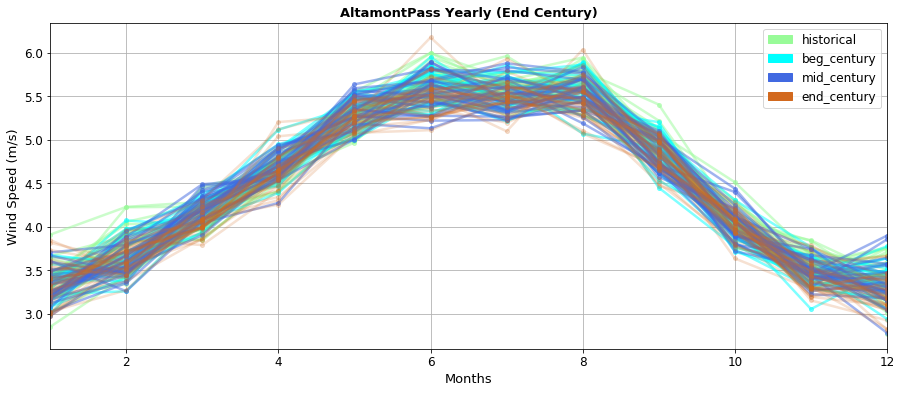

In [17]:
import matplotlib.patches as mpatches

ax = historical.plot(marker='o', markersize= 4, ls = 'solid', alpha = 0.5, color = 'palegreen')
beg_century.plot(ax = ax, marker = 'o', markersize = 4, color = 'cyan', alpha = 0.5)
mid_century.plot(ax = ax, marker='o', markersize=4, color = 'royalblue', alpha = 0.5)
end_century.plot(ax = ax, marker = 'o', markersize = 4, color = 'chocolate', alpha = 0.2)

plt.grid(True)
plt.xlabel('Months', fontsize = 13)
plt.ylabel('Wind Speed (m/s)', fontsize = 13)
plt.title('AltamontPass Yearly (End Century)', weight = 'bold', fontsize = 13)
plt.rcParams['figure.figsize'] = [15, 6]

historical_patch = mpatches.Patch(color='palegreen', label='historical')
beg_century_patch = mpatches.Patch(color='cyan', label='beg_century')
mid_century_patch = mpatches.Patch(color='royalblue', label='mid_century')
end_century_patch = mpatches.Patch(color='chocolate', label='end_century')

plt.legend(handles=[historical_patch, beg_century_patch, mid_century_patch, end_century_patch])
plt.show()

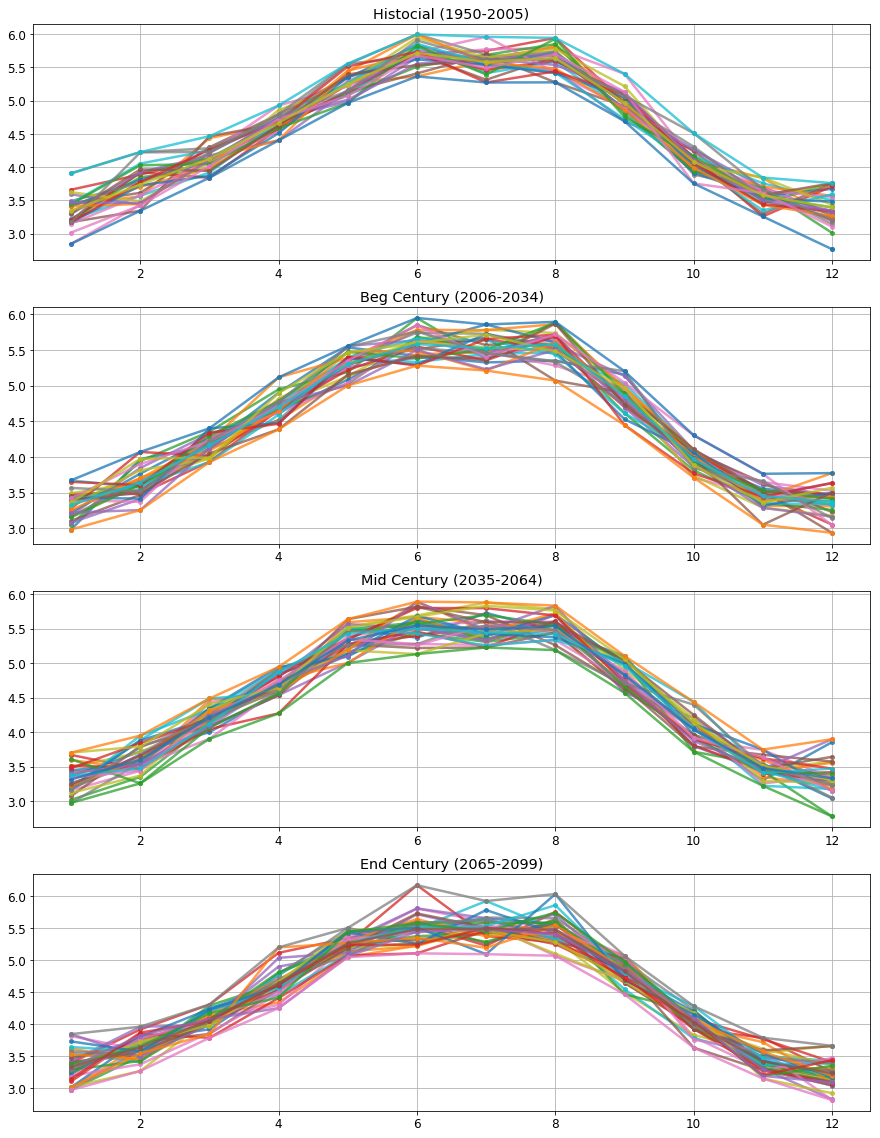

In [23]:
plt.figure(1)
plt.rcParams['figure.figsize'] = [15, 20]

# Historical 
plt.subplot(411)
plt.plot(historical, marker='o', markersize=4, ls = 'solid', alpha = 0.75)
plt.title("Histocial (1950-2005)")
plt.grid(True)

# beg Century
plt.subplot(412)
plt.plot(beg_century, marker='o', markersize=4, ls = 'solid', alpha = 0.75)
plt.title("Beg Century (2006-2034)")
plt.grid(True)

# Mid Century
plt.subplot(413)
plt.plot(mid_century, marker='o', markersize=4, ls = 'solid', alpha = 0.75)
plt.title("Mid Century (2035-2064)")
plt.grid(True)

# End Century
plt.subplot(414)
plt.plot(end_century, marker='o', markersize=4, ls = 'solid', alpha = 0.75)
plt.title("End Century (2065-2099)")
plt.grid(True)

plt.rcParams['figure.figsize'] = [15, 20]

plt.show()

In [19]:
historical['avg'] = historical.mean(axis = 1)
historical['max'] = historical.max(axis = 1)
historical['min'] = historical.min(axis = 1)

In [20]:
beg_century['avg'] = beg_century.mean(axis = 1)
beg_century['min'] = beg_century.max(axis = 1)
beg_century['max'] = beg_century.min(axis = 1)

mid_century['avg'] = mid_century.mean(axis = 1)
mid_century['min'] = mid_century.max(axis = 1)
mid_century['max'] = mid_century.min(axis = 1)

end_century['avg'] = end_century.mean(axis = 1)
end_century['min'] = end_century.min(axis = 1)
end_century['max'] = end_century.max(axis = 1)

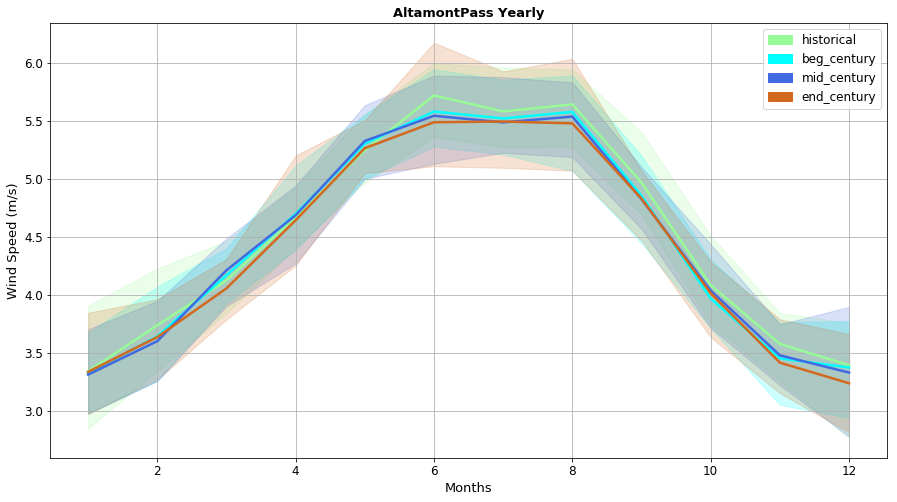

In [25]:
import matplotlib.pyplot as pl
ax = pl.plot(historical.index, historical.avg, 'k-', color = 'palegreen')
pl.fill_between(historical.index, historical['min'], historical['max'], color = 'palegreen', alpha = 0.2)

pl.plot(beg_century.index, beg_century.avg, color = 'cyan')
pl.fill_between(beg_century.index, beg_century['min'], beg_century['max'], color = 'cyan', alpha = 0.2)

pl.plot(mid_century.index, mid_century.avg, color = 'royalblue')
pl.fill_between(mid_century.index, mid_century['min'], mid_century['max'], color = 'royalblue', alpha = 0.2)

pl.plot(end_century.index, end_century.avg, color = 'chocolate')
pl.fill_between(end_century.index, end_century['min'], end_century['max'], color = 'chocolate', alpha = 0.2)

plt.grid(True)
plt.rcParams['figure.figsize'] = [15, 8]

plt.xlabel('Months', fontsize = 13)
plt.ylabel('Wind Speed (m/s)', fontsize = 13)
plt.title('AltamontPass Yearly', weight = 'bold', fontsize = 13)

historical_patch = mpatches.Patch(color='palegreen', label='historical')
beg_century_patch = mpatches.Patch(color='cyan', label='beg_century')
mid_century_patch = mpatches.Patch(color='royalblue', label='mid_century')
end_century_patch = mpatches.Patch(color='chocolate', label='end_century')

plt.legend(handles=[historical_patch, beg_century_patch, mid_century_patch, end_century_patch])